## Observations and Insights 
1. From the Mouse 1509 Treatment of Capomulin, we can see the drug was effective in slowing the growth of the cancer, as the Mouse's tumor volume decreased over time. However, the treament did not stop the spread of the tumor, as there are 3 Metastatic Sites at the 45 day timepoint for l509 and 0 sites initially.  
2. From the number of mice tested per drug and the SEM, we can be relatively confident that the test results are consistent and accurate, as the sample sizes for all the drugs were relatively large(well above n=30 and none below 100) and the SEMs were relatively small (less than 1).
3. From the summary statistics, we can see that Ketapril and Naftisol have larger Tumor Volume means, medians, variances, standard deviations and SEM than that of the placebo.  We can probably infer from the data that not only Ketapril and Naftisol are likely not effective, they might even be detrimental as cancer treatments.
4. Extra: Stelasyn's summary statistics are very close to that of the Placebo's.  We can infer that Stelasyn may have no significant effect on the cancers, and may not be an effective cancer treatment.

In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#determine appropriate 
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset (inner)
merged_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')
#display
merged_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [217]:
# Checking the number of mice in the DataFrame.
mice_number = len(merged_data['Mouse ID'].value_counts())
print(f'The number of Mice in the study is: {mice_number}')
#merged_data['Mouse ID'].value_counts()

The number of Mice in the study is: 249


In [218]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
#checking differences in data frames after clean up
cleaned_length = len(clean_merged_data['Mouse ID'].value_counts())
print(f'The number of Mice in the clean dataset is: {cleaned_length}')
print('Looks like 1 point of bad data was removed')

The number of Mice in the clean dataset is: 248
Looks like 1 point of bad data was removed


In [222]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [223]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]

In [224]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_data['Mouse ID'].value_counts())

248

## Summary Statistics

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_merged_data.groupby(['Drug Regimen'])
drug_data.head()
#means of all drugs
tumor_mean = drug_data['Tumor Volume (mm3)'].mean()
#medians
tumor_median = drug_data['Tumor Volume (mm3)'].median()
#variance
var_data = clean_merged_data.groupby(['Drug Regimen']).var()
var_tumor = var_data['Tumor Volume (mm3)']
#standard deviation
std_data = clean_merged_data.groupby(['Drug Regimen']).std()
std_tumor = std_data['Tumor Volume (mm3)']
std_tumor
#Stardard Error of the Mean
SEM_data = clean_merged_data.groupby(['Drug Regimen']).sem()
SEM_tumor = SEM_data['Tumor Volume (mm3)']
SEM_tumor
# This method is the most straightforward, creating multiple series and putting them all together at the end.
tumor_df = pd.DataFrame({'Tumor Vol Mean':tumor_mean,'Tumor Vol Median':tumor_median,
                        'Tumor Vol Variance':var_tumor,'Tumor Vol Std Dev':std_tumor,
                        'Tumor Vol SEM':SEM_tumor})
tumor_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.0, 'Number of Data Points for Each Drug Regimen')

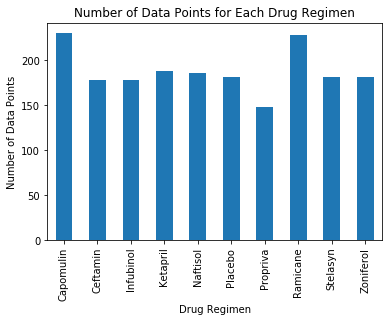

In [226]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#create data for bar plot
mice_count = drug_data['Mouse ID'].count()
drug_count = merged_data['Drug Regimen'].value_counts()

#plot
pandas_mice_bar = mice_count.plot.bar()
pandas_mice_bar.set_xlabel("Drug Regimen")
pandas_mice_bar.set_ylabel("Number of Data Points")
pandas_mice_bar.set_title("Number of Data Points for Each Drug Regimen")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

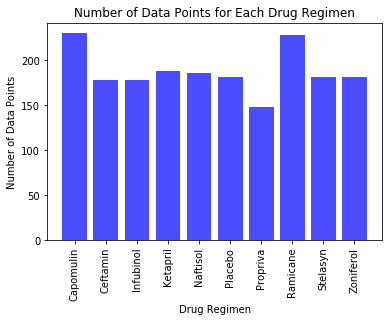

In [227]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#pyplot graph
study_barplot = plt.bar(mice_count.index,mice_count, color='b', alpha = 0.7, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation='vertical')

## Pie Plots

Text(0.5, 1.0, 'Distribution of Female Versus Male Mice')

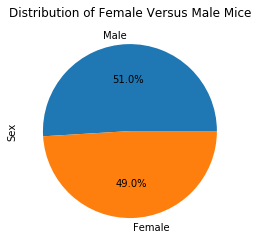

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_merged_data['Sex'].value_counts()
#print(gender)
gender_pie = gender.plot.pie(autopct="%1.1f%%")
gender_pie.set_title("Distribution of Female Versus Male Mice")


Text(0, 0.5, 'Sex')

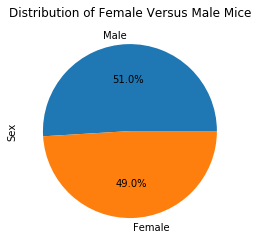

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index

plt.pie(gender,labels=labels,shadow=False, startangle=0,autopct="%1.1f%%")
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#determined top 4 drugs (by lowest SEM)
best_r = tumor_df.sort_values(['Tumor Vol SEM'],ascending=True)
best_r.head(4)
#make a table for the top 4 drugs
best_table = clean_merged_data.loc[merged_data['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_table
#truncate data
best_r_data = best_table[['Drug Regimen','Mouse ID',"Timepoint","Tumor Volume (mm3)"]]
#Capture final Tumor Vol, group by Mouse ID
best_r_last =  best_r_data.groupby(['Mouse ID']).last()
best_r_sort = best_r_last.sort_values(['Drug Regimen'],ascending=True)
#IQR of each drug: 
#note - probably should have figured out how to use a loop or def for this, but I couldn't get it to work

#Capomulin
data_cap = best_r_sort.loc[best_r_sort['Drug Regimen'].isin(["Capomulin"])]
quar_cap = data_cap.quantile([.25,.5,.75])
#IQR etc.
upper_cap = quar_cap['Tumor Volume (mm3)'][0.75]
lower_cap = quar_cap['Tumor Volume (mm3)'][0.25]
iqr_cap = upper_cap-lower_cap
low_bound_cap = lower_cap - (1.5*iqr_cap)
up_bound_cap = upper_cap + (1.5*iqr_cap)

#find outliers
outliers_cap_up = data_cap.loc[(data_cap['Tumor Volume (mm3)']<low_bound_cap)]
outliers_cap_low = data_cap.loc[(data_cap['Tumor Volume (mm3)']>up_bound_cap)]
#returned no data points

#Ramicane
data_ram = best_r_sort.loc[best_r_sort['Drug Regimen'].isin(["Ramicane"])]
quar_ram = data_ram.quantile([.25,.5,.75])
#IQR etc.
upper_ram = quar_ram['Tumor Volume (mm3)'][0.75]
lower_ram = quar_ram['Tumor Volume (mm3)'][0.25]
iqr_ram = upper_ram-lower_ram
low_bound_ram = lower_ram - (1.5*iqr_ram)
up_bound_ram = upper_ram + (1.5*iqr_ram)
#find outliers
outliers_ram_up = data_ram.loc[(data_ram['Tumor Volume (mm3)']<low_bound_ram)]
outliers_ram_low = data_ram.loc[(data_ram['Tumor Volume (mm3)']>up_bound_ram)]
#returned no data points

#Infubinol
data_inf = best_r_sort.loc[best_r_sort['Drug Regimen'].isin(["Infubinol"])]
quar_inf = data_inf.quantile([.25,.5,.75])
#IQR etc.
lower_inf = quar_inf['Tumor Volume (mm3)'][0.25]
upper_inf = quar_inf['Tumor Volume (mm3)'][0.75]
iqr_inf = upper_inf - lower_inf
low_bound_inf = lower_inf - (1.5*iqr_inf)
up_bound_inf = upper_inf + (1.5*iqr_inf)
#find outliers
outliers_inf_up = data_inf.loc[(data_inf['Tumor Volume (mm3)']<low_bound_inf)]
outliers_inf_low = data_inf.loc[(data_inf['Tumor Volume (mm3)']>up_bound_inf)]
#<outliers_inf_up> returned Mouse ID c326 as a possible outlier

#Ceftamin
data_cef = best_r_sort.loc[best_r_sort['Drug Regimen'].isin(["Ceftamin"])]
quar_cef = data_cef.quantile([.25,.5,.75])
#IQR etc.
lower_cef = quar_cef['Tumor Volume (mm3)'][0.25]
upper_cef = quar_cef['Tumor Volume (mm3)'][0.75]
iqr_cef = upper_cef-lower_cef
low_bound_cef = lower_cef - (1.5*iqr_cef)
up_bound_cef = upper_cef + (1.5*iqr_cef)
#find outliers
outliers_cef_up = data_cef.loc[(data_cef['Tumor Volume (mm3)']<low_bound_cef)]
outliers_cef_low = data_cef.loc[(data_cef['Tumor Volume (mm3)']>up_bound_cef)]
#returned no data points

#outliers:
print(f'A possible outlier for <Infubinol> outside the IQR of lower bound: ({round(low_bound_inf,2)}) and upper bound: ({round(up_bound_inf,2)})')
print(outliers_inf_up)

A possible outlier for <Infubinol> outside the IQR of lower bound: (36.83) and upper bound: (82.74)
         Drug Regimen  Timepoint  Tumor Volume (mm3)
Mouse ID                                            
c326        Infubinol          5           36.321346


Text(0.5, 0, 'Drug Regimen')

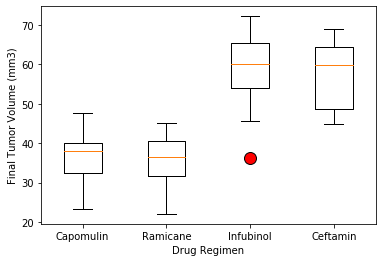

In [231]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create dataset, sort by ID and regimen
box_data =  best_r_data.groupby(['Drug Regimen','Mouse ID']).last()
#create labels for the boxplot
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#create data series for the boxplot
data1 = data_cap['Tumor Volume (mm3)']
data2 = data_ram['Tumor Volume (mm3)']
data3 = data_inf['Tumor Volume (mm3)']
data4 = data_cef['Tumor Volume (mm3)']
data_all =[data1,data2,data3,data4]
#set flier configuration
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
#plot boxplot
plt.boxplot(data_all,labels=labels,flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

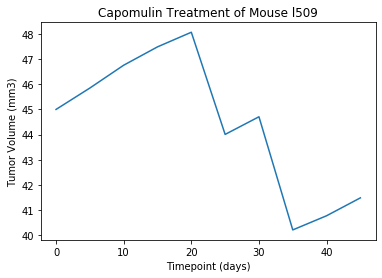

In [235]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#generate data
trunc_data = merged_data[['Drug Regimen','Tumor Volume (mm3)','Mouse ID','Timepoint','Weight (g)','Metastatic Sites']]
#filter by Drug then take data for 1 mouse only - l509
cap_data = trunc_data.loc[trunc_data['Drug Regimen'] == 'Capomulin']
m_cap_data = cap_data.loc[cap_data['Mouse ID'] == 'l509']
#generate line plot:
plt.plot(m_cap_data['Timepoint'],m_cap_data['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
#

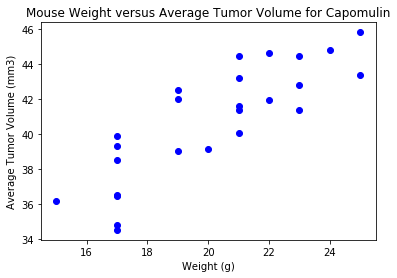

In [233]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#use previous filtered data to create data for average tumor volume:
cap_group = cap_data.groupby(['Mouse ID'])
cap_ave = c_group.mean()
#plot scatter:
plt.scatter(cap_ave['Weight (g)'],cap_ave['Tumor Volume (mm3)'], marker='o', facecolors = "blue",)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin')
plt.show()
#cap_data.loc[cap_data['Mouse ID']=='l509']

## Correlation and Regression

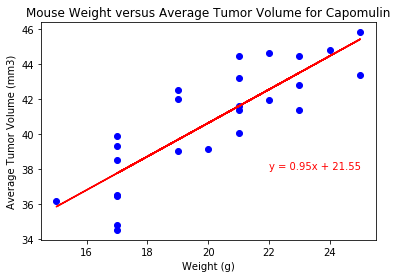

The correlation coefficient (r) is 0.8419363424694718
The r-squared value is 0.7088568047708717
The line equation is y = 0.95x + 21.55


In [234]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#dependency
from scipy.stats import linregress
#linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_ave['Weight (g)'],cap_ave['Tumor Volume (mm3)'])
regress_values = cap_ave['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#replot the above scatterplot
plt.scatter(cap_ave['Weight (g)'],cap_ave['Tumor Volume (mm3)'], marker='o', facecolors = "blue",)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin')
plt.plot(cap_ave['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=10,color="red")
plt.show()
print(f'The correlation coefficient (r) is {rvalue}')
print(f'The r-squared value is {rvalue**2}')
print(f'The line equation is {line_eq}')